In [32]:
#Original 11.5 code

import matplotlib
from pylab import *

# dimension of space 
n = 100 

def initialize(p):
    global config, nextconfig, density
    density = []
    config = zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else 0
    nextconfig = zeros([n, n])
    
def observe():
    global config, nextconfig
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)
    return density


def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config
    
    # calculate density by summing up values in config divided by map dimension size squared
    density.append(sum(config) / len(config)**2)

[0.7283]

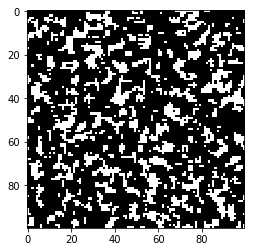

In [35]:
# Test cell 
initialize(0.5)

update()
observe()


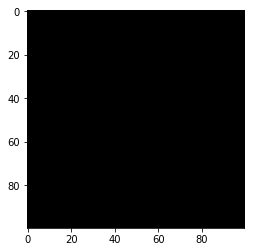

In [37]:
rounds = 25

densities = []
probabilities = [0.05, 0.1, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

for p in probs:
    initialize(p)
    for i in range(rounds):
        update()
    densities.append(observe())


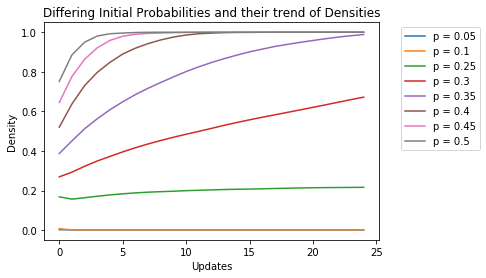

In [41]:
# Plotting trends of densities

for i in range(len(densities)):
    plt.plot(list(range(rounds)), densities[i], label = f"p = {probs[i]}")
    
plt.legend(bbox_to_anchor = (1.05, 1))
plt.title("Differing Initial Probabilities and their trend of Densities")
plt.xlabel("Updates")
plt.ylabel("Density")
plt.show()

### Answer ### 

As we can see, the probabilities 0.05, 0.1, and 0.25 doesn't lead to a full "blacked" out map after 25 updates. 

In [65]:
# Game of Life implementation 

# We only need to change the rules in the updating 

def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
                    
            # Rule change    
            # We don't count the current cell 
            if config[x,y] == 1:
                count -= 1
            
            # lonely -> die 
            if count < 2 and config[x,y] == 1: 
                nextconfig[x,y] = 0 
            
            # not alone -> survive 
            elif (count == 2 or count == 3) and config[x,y] == 1:
                nextconfig[x,y] = 1 
            
            # overpopulation -> die 
            elif count > 3 and config[x,y] == 1:
                nextconfig[x,y] = 0 
                
            # reproduction 
            elif count == 3 and config[x,y] == 0:
                nextconfig[x,y] = 1
                
            else: 
                nextconfig[x,y] = 0 
            
    config, nextconfig = nextconfig, config
    
    # calculate density by summing up values in config divided by map dimension size squared
    density.append(sum(config) / len(config)**2)


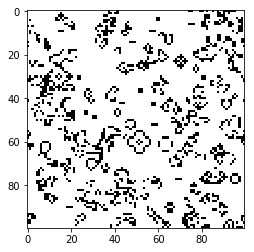

In [66]:
densities = []

probabilities = [0.05, 0.25, 0.5]

for p in probabilities: 
    initialize(p)
    for i in range(rounds):
        update()
    densities.append(observe())



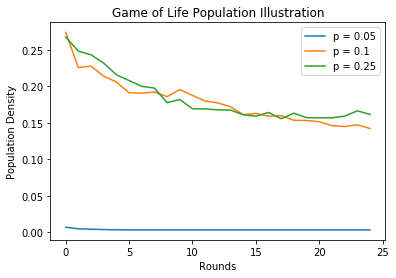

In [67]:
for i in range(len(densities)):
    plt.plot(list(range(rounds)), densities[i], label = f'p = {probs[i]}')
    
plt.legend()
plt.title("Game of Life Population Illustration")
plt.xlabel("Rounds")
plt.ylabel("Population Density")

plt.show()